### Neighborhoods in Los Angeles, California

In [22]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from IPython.display import Image 
from IPython.core.display import HTML 
from bs4 import BeautifulSoup
from urllib.request import urlopen
import folium

In [108]:
# Renter_occ stands for number of units occupied by renters
# Owner_occ stands for number of units occupied by renters
censusdata = pd.read_csv('Census_Data_by_Neighborhood_Council.csv')
censusdata.head()

,NC_Name,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Hispanic_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ
0,ARLETA NC,34932.84,2882.67,409.67,67.64,4061.31,34.96,NaN,37.58,245.05,34700.56,5590.27,2159.94
1,ARROYO SECO NC,21711.47,4640.35,782.76,89.51,3215.37,25.38,NaN,66.98,263.12,21582.85,4138.14,3235.61
2,ATWATER VILLAGE NC,11385.40,3450.70,127.80,0.15,2379.08,71.85,NaN,0.37,252.76,11345.53,1877.30,2902.89
3,BEL AIR-BEVERLY CREST NC,26789.14,22024.61,349.63,0.02,1787.79,0.01,NaN,156.92,946.28,26623.97,8939.21,1943.18
4,BOYLE HEIGHTS NC,81900.56,1562.20,640.97,63.63,2266.59,73.99,NaN,90.30,98.50,81144.31,4743.28,16001.77


In [109]:
censusdata = censusdata.drop('Hispanic_pop', axis=1)
censusdata = censusdata.rename(columns={'NC_Name':'Neighborhood Council'})
censusdata['Neighborhood Council'] = censusdata['Neighborhood Council'].str.replace('NC', '')
censusdata.head()

,Neighborhood Council,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ
0,ARLETA,34932.84,2882.67,409.67,67.64,4061.31,34.96,37.58,245.05,34700.56,5590.27,2159.94
1,ARROYO SECO,21711.47,4640.35,782.76,89.51,3215.37,25.38,66.98,263.12,21582.85,4138.14,3235.61
2,ATWATER VILLAGE,11385.40,3450.70,127.80,0.15,2379.08,71.85,0.37,252.76,11345.53,1877.30,2902.89
3,BEL AIR-BEVERLY CREST,26789.14,22024.61,349.63,0.02,1787.79,0.01,156.92,946.28,26623.97,8939.21,1943.18
4,BOYLE HEIGHTS,81900.56,1562.20,640.97,63.63,2266.59,73.99,90.30,98.50,81144.31,4743.28,16001.77


In [110]:
censusdata['address']=censusdata['Neighborhood Council']+','+'Los Angeles, California'

In [111]:
from geopy.extra.rate_limiter import RateLimiter
# create locator that holds the Geocoding service, Nominatim
locator = Nominatim(user_agent='LA_explorer')
# conveneint function to delay between geocoding calls: RateLimiter
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# create location column
censusdata['location']=censusdata['address'].apply(geocode)
# create longitude, latitude and altitude from location column (returns tuple)
censusdata['point']=censusdata['location'].apply(lambda loc: tuple(loc.point) if loc else None)


In [117]:
# split point column into latitude, longitude and altitude columns
censusdata[['Latitude', 'Longitude', 'altitude']]= pd.DataFrame(censusdata['point'].tolist(), index=censusdata.index)
censusdata = pd.DataFrame(censusdata.drop(['location', 'point', 'altitude', 'address'], axis=1))


In [118]:
censusdata= pd.DataFrame(censusdata.dropna(subset=['Latitude'], axis=0))
censusdata.isnull().values.any()

False

In [133]:
censusdata.reset_index(drop=True, inplace=True)
censusdata = pd.DataFrame(censusdata.drop(['index', 'level_0'], axis=1))

KeyError: "['index' 'level_0'] not found in axis"

In [134]:
censusdata

,Neighborhood Council,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude
0,ARLETA,34932.84,2882.67,409.67,67.64,4061.31,34.96,37.58,245.05,34700.56,5590.27,2159.94,34.241327,-118.432205
1,ARROYO SECO,21711.47,4640.35,782.76,89.51,3215.37,25.38,66.98,263.12,21582.85,4138.14,3235.61,34.112953,-118.176531
2,ATWATER VILLAGE,11385.40,3450.70,127.80,0.15,2379.08,71.85,0.37,252.76,11345.53,1877.30,2902.89,34.118698,-118.262392
3,BOYLE HEIGHTS,81900.56,1562.20,640.97,63.63,2266.59,73.99,90.30,98.50,81144.31,4743.28,16001.77,34.043689,-118.209768
4,CANOGA PARK,47610.41,9635.07,1552.18,195.64,5932.33,69.39,61.12,605.86,47127.90,5264.73,8970.22,34.201078,-118.597826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,WESTSIDE,31659.94,21981.59,683.18,17.89,5059.40,194.93,156.38,1074.33,31498.41,7462.54,6741.44,33.977401,-118.422495
65,WESTWOOD,55443.69,32378.17,1466.24,83.11,14590.55,53.25,214.83,1886.53,42049.98,6384.67,13134.65,34.066895,-118.439945
66,WILMINGTON,59140.55,3840.90,1406.41,173.57,1203.80,361.61,9.32,306.10,58039.47,6169.10,8086.33,33.780016,-118.262509
67,WILSHIRE CENTER - KOREATOWN,99702.15,7364.20,3608.43,216.59,32842.25,392.87,628.59,1025.46,99508.61,2141.05,36026.35,34.062662,-118.290610


In [135]:
address = 'Los Angeles, California'
geolocator = Nominatim(user_agent="LA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of LA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of LA are 34.0536909, -118.2427666.


In [143]:
# create map of Toronto using latitude and longitude values
map_LA = folium.Map(location=[latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng  in zip(censusdata['Latitude'], censusdata['Longitude']):
#    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
 #       popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
    
map_LA

In [144]:
CLIENT_ID = 'FM24JFR1QZWPVUMV5SSJM1VQEVWUNCWHMWSKRFATRNGXEPVA' # your Foursquare ID
CLIENT_SECRET = 'CAGCDDF02NDTJI4VFJJQ0O3P0G3L4W3LG10DCTK4J3BR2LSO' # your Foursquare Secret
VERSION = '20200805' # Foursquare API version

In [145]:
# Get the neighborhood's latitude and longitude values
address = "Los Angeles, California"
geolocator = Nominatim(user_agent="CA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geograpical coordinate of LA are {}, {}.".format(latitude, longitude))

The geograpical coordinate of LA are 34.0536909, -118.2427666.


In [146]:
# Creating request URL to get the venues near Queen's Park
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FM24JFR1QZWPVUMV5SSJM1VQEVWUNCWHMWSKRFATRNGXEPVA&client_secret=CAGCDDF02NDTJI4VFJJQ0O3P0G3L4W3LG10DCTK4J3BR2LSO&v=20200805&ll=34.0536909,-118.2427666&radius=500&limit=100'

In [147]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f2ca5e817a0975c8ceaa012'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Civic Center',
  'headerFullLocation': 'Civic Center, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 27,
  'suggestedBounds': {'ne': {'lat': 34.0581909045, 'lng': -118.23734531946405},
   'sw': {'lat': 34.0491908955, 'lng': -118.24818788053594}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fecf601067d351381ea64fa',
       'name': 'Grand Park',
       'location': {'address': '200 N Grand Ave',
        'crossStreet': 'btwn Temple & 1st St',
        'lat': 34.05503441823839,
        'lng': -118.245

In [148]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [149]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-149-f25156d922d2>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Grand Park,Park,34.055034,-118.245179
1,Redbird,American Restaurant,34.050666,-118.244068
2,Badmaash,Indian Restaurant,34.051342,-118.244571
3,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246
4,Blue Whale Bar,Jazz Club,34.049884,-118.242114


In [150]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

27 venues were returned by Foursquare.


In [151]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [153]:
LA_venues = getNearbyVenues(names=censusdata['Neighborhood Council'],
                                   latitudes=censusdata['Latitude'],
                                   longitudes=censusdata['Longitude']
                                  )


ARLETA 
ARROYO SECO 
ATWATER VILLAGE 
BOYLE HEIGHTS 
CANOGA PARK 
CENTRAL ALAMEDA 
CENTRAL HOLLYWOOD 
CHATSWORTH 
DEL REY 
DOWNTOWN LOS ANGELES
EAGLE ROCK 
EAST HOLLYWOOD 
ELYSIAN VALLEY RIVERSIDE 
GLASSELL PARK 
GRANADA HILLS NORTH 
GRANADA HILLS SOUTH 
GREATER WILSHIRE 
HARBOR CITY 
HARBOR GATEWAY NORTH 
HARBOR GATEWAY SOUTH 
HERMON 
HISTORIC HIGHLAND PARK 
HOLLYWOOD HILLS WEST 
HOLLYWOOD STUDIO DISTRICT 
HOLLYWOOD UNITED 
LA-32 
LAKE BALBOA 
LOS FELIZ 
MACARTHUR PARK 
MAR VISTA CC
MID CITY 
MID CITY WEST CC
MISSION HILLS 
 VALLEY VILLAGE
 WESTCHESTER/PLAYA
NOHO WEST 
NORTH HILLS EAST
NORTH HILLS WEST 
NORTH HOLLYWOOD NORTHEAST 
NORTHRIDGE EAST
NORTHRIDGE SOUTH 
NORTHRIDGE WEST
OLYMPIC PARK 
PACOIMA 
PALMS 
PANORAMA CITY 
PICO UNION 
RESEDA 
SHERMAN OAKS 
SILVER LAKE 
SOUTH CENTRAL 
STUDIO CITY 
SUN VALLEY AREA 
SUNLAND-TUJUNGA 
SYLMAR 
TARZANA 
VAN NUYS 
VENICE 
WATTS 
WEST ADAMS 
WEST HILLS 
WEST LOS ANGELES 
WESTLAKE NORTH 
WESTLAKE SOUTH 
WESTSIDE 
WESTWOOD 
WILMINGTON 
WILSHIRE 

In [154]:
print(LA_venues.shape)
LA_venues.head()

(1645, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ARLETA,34.241327,-118.432205,Back To The Future Filming Location - McFly's ...,34.243429,-118.433655,Historic Site
1,ARLETA,34.241327,-118.432205,Edwards Cinema,34.241197,-118.430284,Movie Theater
2,ARLETA,34.241327,-118.432205,Canterbury & Kelowna,34.239525,-118.435370,Movie Theater
3,ARROYO SECO,34.112953,-118.176531,Arroyo Seco Golf Course,34.113698,-118.171971,Golf Course
4,ARROYO SECO,34.112953,-118.176531,Monarch Waystation,34.112760,-118.175031,Monument / Landmark


In [155]:
LA_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
VALLEY VILLAGE,15,15,15,15,15,15
WESTCHESTER/PLAYA,6,6,6,6,6,6
ARLETA,3,3,3,3,3,3
ARROYO SECO,6,6,6,6,6,6
ATWATER VILLAGE,42,42,42,42,42,42
...,...,...,...,...,...,...
WESTSIDE,31,31,31,31,31,31
WESTWOOD,18,18,18,18,18,18
WILMINGTON,13,13,13,13,13,13


In [156]:
# one hot encoding
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Yoga Studio,ATM,Adult Boutique,Alternative Healer,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped

,Neighborhood,Yoga Studio,ATM,Adult Boutique,Alternative Healer,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,VALLEY VILLAGE,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.066667,...,0.0,0.0,0.000000,0.066667,0.000000,0.0,0.00000,0.0,0.000000,0.0
1,WESTCHESTER/PLAYA,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
2,ARLETA,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
3,ARROYO SECO,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
4,ATWATER VILLAGE,0.0,0.0,0.0,0.0,0.023810,0.0,0.0,0.023810,0.000000,...,0.0,0.0,0.000000,0.000000,0.047619,0.0,0.02381,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,WESTSIDE,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
65,WESTWOOD,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0
66,WILMINGTON,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.076923,0.000000,0.0,0.00000,0.0,0.000000,0.0
67,WILSHIRE CENTER - KOREATOWN,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.033333,...,0.0,0.0,0.033333,0.000000,0.000000,0.0,0.00000,0.0,0.033333,0.0


In [159]:
num_top_venues = 5

for hood in LA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- VALLEY VILLAGE----
              venue  freq
0    Discount Store  0.07
1  Asian Restaurant  0.07
2           Theater  0.07
3     Grocery Store  0.07
4  Sushi Restaurant  0.07


---- WESTCHESTER/PLAYA----
                  venue  freq
0                  Pool  0.33
1                Garden  0.17
2           Flower Shop  0.17
3                 Beach  0.17
4  Gym / Fitness Center  0.17


----ARLETA ----
               venue  freq
0      Movie Theater  0.67
1      Historic Site  0.33
2        Yoga Studio  0.00
3       Optical Shop  0.00
4  Mobile Phone Shop  0.00


----ARROYO SECO ----
                 venue  freq
0  Monument / Landmark  0.17
1          Golf Course  0.17
2        Garden Center  0.17
3          Film Studio  0.17
4                Diner  0.17


----ATWATER VILLAGE ----
                   venue  freq
0           Liquor Store  0.05
1            Coffee Shop  0.05
2  Vietnamese Restaurant  0.05
3            Pizza Place  0.05
4         Ice Cream Shop  0.02


----BOYLE HEIGHTS -

In [160]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [164]:
# create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LA_grouped['Neighborhood']

for ind in np.arange(LA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,VALLEY VILLAGE,Cosmetics Shop,Grocery Store,Pizza Place,Convenience Store,Eastern European Restaurant,Sushi Restaurant,Video Store,Chinese Restaurant,Fried Chicken Joint,Arts & Crafts Store
1,WESTCHESTER/PLAYA,Pool,Gym / Fitness Center,Flower Shop,Garden,Beach,Women's Store,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
2,ARLETA,Movie Theater,Historic Site,Women's Store,Event Space,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service
3,ARROYO SECO,Diner,Golf Course,Monument / Landmark,Trail,Garden Center,Film Studio,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
4,ATWATER VILLAGE,Vietnamese Restaurant,Liquor Store,Pizza Place,Coffee Shop,Ice Cream Shop,Record Shop,Sporting Goods Shop,Boutique,Latin American Restaurant,Shipping Store


#### Relationship between poverty and venues

In [165]:
censusdata.head()

,Neighborhood Council,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude
0,ARLETA,34932.84,2882.67,409.67,67.64,4061.31,34.96,37.58,245.05,34700.56,5590.27,2159.94,34.241327,-118.432205
1,ARROYO SECO,21711.47,4640.35,782.76,89.51,3215.37,25.38,66.98,263.12,21582.85,4138.14,3235.61,34.112953,-118.176531
2,ATWATER VILLAGE,11385.40,3450.70,127.80,0.15,2379.08,71.85,0.37,252.76,11345.53,1877.30,2902.89,34.118698,-118.262392
3,BOYLE HEIGHTS,81900.56,1562.20,640.97,63.63,2266.59,73.99,90.30,98.50,81144.31,4743.28,16001.77,34.043689,-118.209768
4,CANOGA PARK,47610.41,9635.07,1552.18,195.64,5932.33,69.39,61.12,605.86,47127.90,5264.73,8970.22,34.201078,-118.597826


In [173]:
censusdata['poverty ratio']=censusdata['In_Poverty'].div(censusdata['Total Population'])


AttributeError: 'DataFrame' object has no attribute 'sort_value'

In [175]:
censusdata.sort_values(by='poverty ratio')

,Neighborhood Council,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,poverty ratio
65,WESTWOOD,55443.69,32378.17,1466.24,83.11,14590.55,53.25,214.83,1886.53,42049.98,6384.67,13134.65,34.066895,-118.439945,0.758427
39,NORTHRIDGE EAST,25584.76,11426.37,1923.97,51.61,5424.17,11.99,73.68,602.38,23237.26,4837.79,3415.65,34.234561,-118.536932,0.908246
34,WESTCHESTER/PLAYA,58145.15,30895.07,7420.76,143.39,7615.58,107.70,119.36,2383.39,54566.26,12612.31,11986.51,33.951684,-118.439007,0.938449
10,EAGLE ROCK,31812.31,9246.63,408.76,140.12,7787.22,62.97,46.19,793.85,30065.65,5839.30,4752.25,34.136688,-118.207680,0.945095
9,DOWNTOWN LOS ANGELES,40227.20,10689.28,6915.39,110.71,7388.38,228.18,199.22,767.91,38844.73,2519.25,18885.96,34.042849,-118.247673,0.965633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WEST ADAMS,27090.33,1064.55,8908.75,29.26,722.91,6.99,172.14,421.54,27026.75,3430.31,5799.66,34.029436,-118.352483,0.997653
67,WILSHIRE CENTER - KOREATOWN,99702.15,7364.20,3608.43,216.59,32842.25,392.87,628.59,1025.46,99508.61,2141.05,36026.35,34.062662,-118.290610,0.998059
18,HARBOR GATEWAY NORTH,34574.96,747.72,11062.99,12.49,2121.55,0.39,100.20,426.71,34524.94,4202.25,5474.86,33.854225,-118.299220,0.998553
12,ELYSIAN VALLEY RIVERSIDE,6934.61,623.33,77.02,2.18,1788.76,48.26,11.69,148.09,6926.92,945.96,1222.42,34.095913,-118.242033,0.998891


In [176]:
count, bin_edges = np.histogram(censusdata['poverty ratio'])

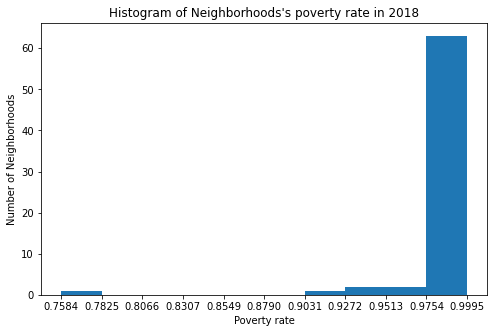

In [182]:
import matplotlib.pyplot as plt
censusdata['poverty ratio'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title("Histogram of Neighborhoods's poverty rate in 2018") # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Poverty rate') # add x-label

plt.show()

In [185]:
LAsorted = LA_venues.groupby('Neighborhood').count()

In [192]:
LAsorted[['Venue']].sort_values(by='Venue')


,Venue
Neighborhood,
GRANADA HILLS SOUTH,1
GRANADA HILLS NORTH,1
WEST HILLS,2
GREATER WILSHIRE,2
ARLETA,3
...,...
HOLLYWOOD UNITED,63
HOLLYWOOD STUDIO DISTRICT,74
SHERMAN OAKS,84


Text(0.5, 1.0, 'Total Venues in each Neighborhood 2018')

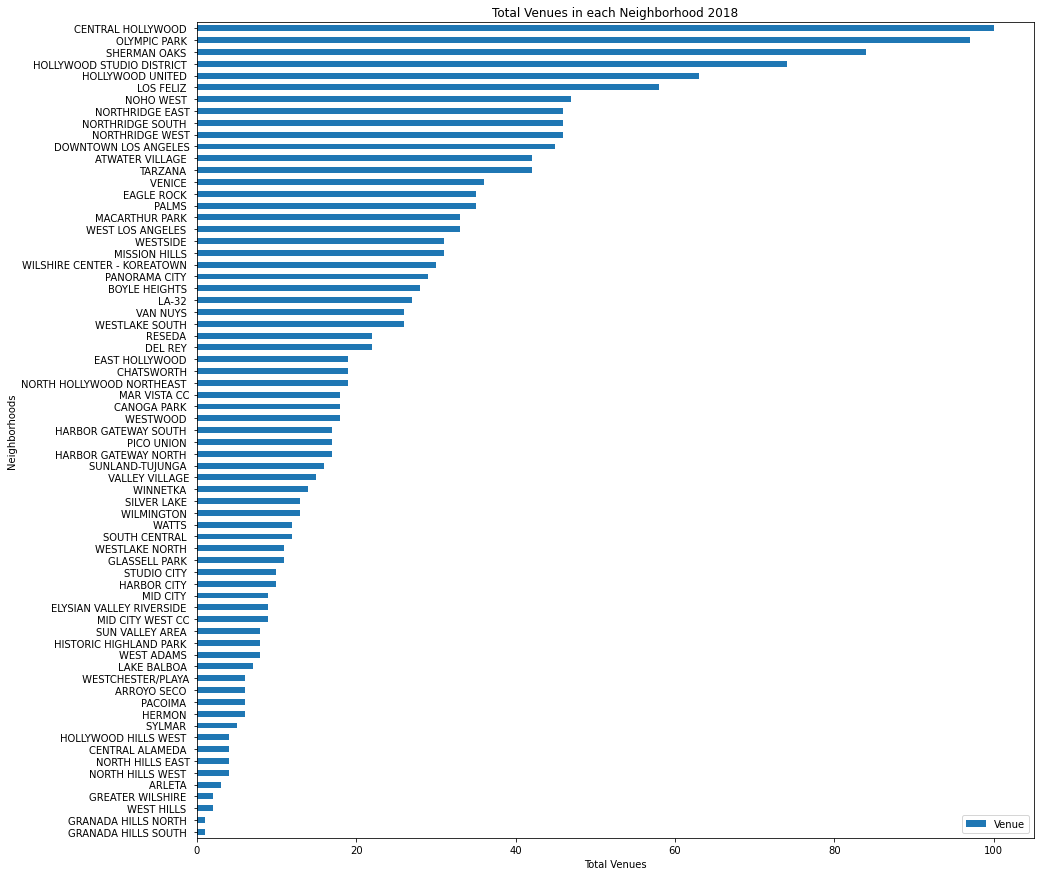

In [194]:
LAsorted[['Venue']].sort_values(by='Venue').plot(kind='barh', figsize=(15,15))
plt.xlabel('Total Venues')
plt.ylabel('Neighborhoods')
plt.title('Total Venues in each Neighborhood 2018')


In [199]:
legend = neighborhoods_venues_sorted.columns[1: -1]

Index(['1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue'],
      dtype='object')

In [212]:
freq=temp.sort_values
freq

<bound method DataFrame.sort_values of                    venue  freq
1            Yoga Studio   0.0
2                    ATM   0.0
3         Adult Boutique   0.0
4     Alternative Healer   0.0
5    American Restaurant   0.0
..                   ...   ...
241           Waterfront   0.0
242             Wine Bar   0.0
243            Wine Shop   0.0
244          Wings Joint   0.0
245        Women's Store   0.0

[245 rows x 2 columns]>

In [214]:
from sklearn.cluster import KMeans
kclusters = 5

LA_grouped_clustering = LA_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 4, 1, 2, 2, 2, 1, 2, 2], dtype=int32)

In [216]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [219]:
LA_merged = censusdata
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
LA_merged = LA_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood Council')
LA_merged.head() # check the last columns!

,Neighborhood Council,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ARLETA,34932.84,2882.67,409.67,67.64,4061.31,34.96,37.58,245.05,34700.56,...,Movie Theater,Historic Site,Women's Store,Event Space,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service
1,ARROYO SECO,21711.47,4640.35,782.76,89.51,3215.37,25.38,66.98,263.12,21582.85,...,Diner,Golf Course,Monument / Landmark,Trail,Garden Center,Film Studio,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
2,ATWATER VILLAGE,11385.40,3450.70,127.80,0.15,2379.08,71.85,0.37,252.76,11345.53,...,Vietnamese Restaurant,Liquor Store,Pizza Place,Coffee Shop,Ice Cream Shop,Record Shop,Sporting Goods Shop,Boutique,Latin American Restaurant,Shipping Store
3,BOYLE HEIGHTS,81900.56,1562.20,640.97,63.63,2266.59,73.99,90.30,98.50,81144.31,...,Mexican Restaurant,Grocery Store,Bakery,Fast Food Restaurant,ATM,Burger Joint,Fried Chicken Joint,Café,Sushi Restaurant,Coffee Shop
4,CANOGA PARK,47610.41,9635.07,1552.18,195.64,5932.33,69.39,61.12,605.86,47127.90,...,Rental Car Location,Asian Restaurant,Thrift / Vintage Store,Pet Store,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Café,Gas Station,Theater


In [221]:
LA_merged['Cluster Labels'] = LA_merged['Cluster Labels'].astype(int, errors='ignore')

In [222]:
LA_merged['Cluster Labels'].isin(['nan']).any().any()

False

In [224]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LA_merged['Latitude'], LA_merged['Longitude'], LA_merged['Neighborhood Council'], LA_merged['Cluster Labels']):
    cluster=int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [225]:
LA_merged.loc[LA_merged['Cluster Labels'] == 0, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]


,Total Population,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,25141.73,3837.55,0.00,27.84,945.54,25018.69,6967.01,765.40,34.296279,-118.505901,...,Home Service,Women's Store,Electronics Store,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service,Film Studio
15,28073.23,4845.82,92.34,24.11,732.34,27822.12,5351.09,4004.77,34.296279,-118.505901,...,Home Service,Women's Store,Electronics Store,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service,Film Studio


In [228]:
LA_merged.loc[LA_merged['Cluster Labels'] == 1, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]


,Total Population,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,21711.47,3215.37,25.38,66.98,263.12,21582.85,4138.14,3235.61,34.112953,-118.176531,...,Diner,Golf Course,Monument / Landmark,Trail,Garden Center,Film Studio,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
5,28249.27,259.14,22.77,48.07,100.08,28100.25,1912.16,4389.37,34.004015,-118.247784,...,Food,Park,Light Rail Station,Mexican Restaurant,Women's Store,Falafel Restaurant,Food Service,Food Court,Flower Shop,Flea Market
12,6934.61,1788.76,48.26,11.69,148.09,6926.92,945.96,1222.42,34.095913,-118.242033,...,Trail,Basketball Court,Burrito Place,Rental Car Location,Park,Gym / Fitness Center,Intersection,Rock Club,Electronics Store,Event Space
16,50090.79,17145.97,42.24,244.96,1021.38,49891.11,6342.81,14220.60,34.052700,-118.452639,...,Playground,Basketball Court,Women's Store,Event Space,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service
17,23444.52,3512.28,265.33,12.94,1011.64,23354.24,3815.04,3742.95,33.797282,-118.300472,...,Chinese Restaurant,Food,Korean Restaurant,Mexican Restaurant,Bakery,Donut Shop,Park,Convenience Store,Waterfront,Home Service
20,4395.45,915.43,0.00,0.43,92.00,4377.46,837.87,837.24,34.107314,-118.185251,...,Health & Beauty Service,Grocery Store,Pharmacy,Supermarket,Dog Run,Park,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
21,55626.43,6505.29,26.95,58.07,818.23,54637.80,6913.35,10118.24,34.100499,-118.205672,...,Trail,Park,Mexican Restaurant,Grocery Store,Donut Shop,Light Rail Station,History Museum,Flea Market,Financial or Legal Service,Film Studio
26,43219.20,3040.60,19.70,110.63,948.14,43104.05,6713.55,7472.35,34.181166,-118.495236,...,Park,Baseball Field,Athletics & Sports,Golf Course,American Restaurant,Boat Rental,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service
34,58145.15,7615.58,107.70,119.36,2383.39,54566.26,12612.31,11986.51,33.951684,-118.439007,...,Pool,Gym / Fitness Center,Flower Shop,Garden,Beach,Women's Store,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
36,40578.75,4449.87,25.99,0.04,313.78,40103.33,2827.14,7416.87,34.242958,-118.485408,...,Bus Station,Coffee Shop,Sculpture Garden,Farm,Women's Store,Event Space,Food Court,Food,Flower Shop,Flea Market


In [229]:
LA_merged.loc[LA_merged['Cluster Labels'] == 2, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]


,Total Population,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,11385.40,2379.08,71.85,0.37,252.76,11345.53,1877.30,2902.89,34.118698,-118.262392,...,Vietnamese Restaurant,Liquor Store,Pizza Place,Coffee Shop,Ice Cream Shop,Record Shop,Sporting Goods Shop,Boutique,Latin American Restaurant,Shipping Store
3,81900.56,2266.59,73.99,90.30,98.50,81144.31,4743.28,16001.77,34.043689,-118.209768,...,Mexican Restaurant,Grocery Store,Bakery,Fast Food Restaurant,ATM,Burger Joint,Fried Chicken Joint,Café,Sushi Restaurant,Coffee Shop
4,47610.41,5932.33,69.39,61.12,605.86,47127.90,5264.73,8970.22,34.201078,-118.597826,...,Rental Car Location,Asian Restaurant,Thrift / Vintage Store,Pet Store,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Café,Gas Station,Theater
6,19861.33,1179.26,81.56,13.65,567.42,19808.73,679.64,9033.08,34.098003,-118.329523,...,Lounge,Coffee Shop,Mexican Restaurant,Pizza Place,American Restaurant,Bar,Vegetarian / Vegan Restaurant,Hotel,Nightclub,Movie Theater
7,39816.55,7239.56,20.55,83.92,1348.13,39187.70,9160.98,4603.02,34.259571,-118.602325,...,Mexican Restaurant,Pool Hall,Thai Restaurant,Fast Food Restaurant,Donut Shop,Supermarket,Business Service,Gym / Fitness Center,Rock Club,Marijuana Dispensary
8,34594.62,5517.35,35.95,32.74,962.14,34577.20,5773.89,8024.71,33.989653,-118.424344,...,Mexican Restaurant,Hobby Shop,Bakery,Pet Store,Pizza Place,Deli / Bodega,Coffee Shop,Diner,Donut Shop,Bus Station
9,40227.20,7388.38,228.18,199.22,767.91,38844.73,2519.25,18885.96,34.042849,-118.247673,...,Bar,Taco Place,Coffee Shop,American Restaurant,Arts & Crafts Store,Restaurant,Ice Cream Shop,Gym / Fitness Center,Pet Store,Nightclub
10,31812.31,7787.22,62.97,46.19,793.85,30065.65,5839.30,4752.25,34.136688,-118.207680,...,Italian Restaurant,Asian Restaurant,French Restaurant,Thai Restaurant,Pet Store,Cosmetics Shop,Bubble Tea Shop,Burger Joint,Shipping Store,Chinese Restaurant
11,46533.39,6783.16,6.95,129.83,590.40,45523.26,1301.36,15036.30,34.090428,-118.296625,...,Bakery,Convenience Store,Asian Restaurant,Pharmacy,Mediterranean Restaurant,Middle Eastern Restaurant,Bus Line,Food Truck,Sandwich Place,Taco Place
13,21969.41,3943.97,20.97,25.53,341.77,21840.82,3150.99,4018.89,34.116120,-118.228963,...,Pizza Place,Other Great Outdoors,Fast Food Restaurant,Shipping Store,Liquor Store,Café,Sandwich Place,Bakery,Restaurant,Pharmacy


In [230]:
LA_merged.loc[LA_merged['Cluster Labels'] == 3, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]


,Total Population,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,75158.2,4376.59,58.96,301.21,587.07,74028.67,13252.74,6133.06,34.307625,-118.449215,...,Pizza Place,Food,Mexican Restaurant,Women's Store,Event Space,Food Service,Food Court,Flower Shop,Flea Market,Financial or Legal Service


In [231]:
LA_merged.loc[LA_merged['Cluster Labels'] == 4, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]


,Total Population,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,34932.84,4061.31,34.96,37.58,245.05,34700.56,5590.27,2159.94,34.241327,-118.432205,...,Movie Theater,Historic Site,Women's Store,Event Space,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service


In [233]:
LA_merged2=LA_merged.loc[LA_merged['Cluster Labels'] == 2, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]
LA_merged1=LA_merged.loc[LA_merged['Cluster Labels'] == 1, LA_merged.columns[[1] + list(range(5, LA_merged.shape[1]))]]
LA_merged1

,Total Population,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,21711.47,3215.37,25.38,66.98,263.12,21582.85,4138.14,3235.61,34.112953,-118.176531,...,Diner,Golf Course,Monument / Landmark,Trail,Garden Center,Film Studio,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
5,28249.27,259.14,22.77,48.07,100.08,28100.25,1912.16,4389.37,34.004015,-118.247784,...,Food,Park,Light Rail Station,Mexican Restaurant,Women's Store,Falafel Restaurant,Food Service,Food Court,Flower Shop,Flea Market
12,6934.61,1788.76,48.26,11.69,148.09,6926.92,945.96,1222.42,34.095913,-118.242033,...,Trail,Basketball Court,Burrito Place,Rental Car Location,Park,Gym / Fitness Center,Intersection,Rock Club,Electronics Store,Event Space
16,50090.79,17145.97,42.24,244.96,1021.38,49891.11,6342.81,14220.60,34.052700,-118.452639,...,Playground,Basketball Court,Women's Store,Event Space,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service
17,23444.52,3512.28,265.33,12.94,1011.64,23354.24,3815.04,3742.95,33.797282,-118.300472,...,Chinese Restaurant,Food,Korean Restaurant,Mexican Restaurant,Bakery,Donut Shop,Park,Convenience Store,Waterfront,Home Service
20,4395.45,915.43,0.00,0.43,92.00,4377.46,837.87,837.24,34.107314,-118.185251,...,Health & Beauty Service,Grocery Store,Pharmacy,Supermarket,Dog Run,Park,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
21,55626.43,6505.29,26.95,58.07,818.23,54637.80,6913.35,10118.24,34.100499,-118.205672,...,Trail,Park,Mexican Restaurant,Grocery Store,Donut Shop,Light Rail Station,History Museum,Flea Market,Financial or Legal Service,Film Studio
26,43219.20,3040.60,19.70,110.63,948.14,43104.05,6713.55,7472.35,34.181166,-118.495236,...,Park,Baseball Field,Athletics & Sports,Golf Course,American Restaurant,Boat Rental,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service
34,58145.15,7615.58,107.70,119.36,2383.39,54566.26,12612.31,11986.51,33.951684,-118.439007,...,Pool,Gym / Fitness Center,Flower Shop,Garden,Beach,Women's Store,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
36,40578.75,4449.87,25.99,0.04,313.78,40103.33,2827.14,7416.87,34.242958,-118.485408,...,Bus Station,Coffee Shop,Sculpture Garden,Farm,Women's Store,Event Space,Food Court,Food,Flower Shop,Flea Market


In [254]:
LA_merged=LA_merged.set_index('Neighborhood Council')

KeyError: "None of ['Neighborhood Council'] are in the columns"

In [255]:
LA_merged

,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood Council,,,,,,,,,,,,,,,,,,,,,
ARLETA,34932.84,2882.67,409.67,67.64,4061.31,34.96,37.58,245.05,34700.56,5590.27,...,Movie Theater,Historic Site,Women's Store,Event Space,Food Service,Food Court,Food,Flower Shop,Flea Market,Financial or Legal Service
ARROYO SECO,21711.47,4640.35,782.76,89.51,3215.37,25.38,66.98,263.12,21582.85,4138.14,...,Diner,Golf Course,Monument / Landmark,Trail,Garden Center,Film Studio,Filipino Restaurant,Farm,Farmers Market,Fast Food Restaurant
ATWATER VILLAGE,11385.40,3450.70,127.80,0.15,2379.08,71.85,0.37,252.76,11345.53,1877.30,...,Vietnamese Restaurant,Liquor Store,Pizza Place,Coffee Shop,Ice Cream Shop,Record Shop,Sporting Goods Shop,Boutique,Latin American Restaurant,Shipping Store
BOYLE HEIGHTS,81900.56,1562.20,640.97,63.63,2266.59,73.99,90.30,98.50,81144.31,4743.28,...,Mexican Restaurant,Grocery Store,Bakery,Fast Food Restaurant,ATM,Burger Joint,Fried Chicken Joint,Café,Sushi Restaurant,Coffee Shop
CANOGA PARK,47610.41,9635.07,1552.18,195.64,5932.33,69.39,61.12,605.86,47127.90,5264.73,...,Rental Car Location,Asian Restaurant,Thrift / Vintage Store,Pet Store,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Café,Gas Station,Theater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WESTSIDE,31659.94,21981.59,683.18,17.89,5059.40,194.93,156.38,1074.33,31498.41,7462.54,...,Food Truck,Grocery Store,Coffee Shop,Ice Cream Shop,Burger Joint,Cycle Studio,Fast Food Restaurant,Café,Nail Salon,New American Restaurant
WESTWOOD,55443.69,32378.17,1466.24,83.11,14590.55,53.25,214.83,1886.53,42049.98,6384.67,...,Hotel,Coffee Shop,Sandwich Place,Café,Bus Station,Steakhouse,Garden,Fountain,Pizza Place,Plaza
WILMINGTON,59140.55,3840.90,1406.41,173.57,1203.80,361.61,9.32,306.10,58039.47,6169.10,...,Burger Joint,Pizza Place,Discount Store,Pharmacy,Mobile Phone Shop,Seafood Restaurant,Sandwich Place,Bank,Grocery Store,Chinese Restaurant


In [263]:
LA_merged.columns

Index(['Total Population', 'White_pop', 'Black_pop', 'Ameri_es_pop',
       'Asian_pop', 'Hawn_pi_pop', 'Other_pop', 'Multi_pop', 'In_Poverty',
       'Owner_occ', 'Renter_occ', 'Latitude', 'Longitude', 'poverty ratio',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

Text(0.5, 1.0, 'Population of each ethnicity in Neighborhoods')

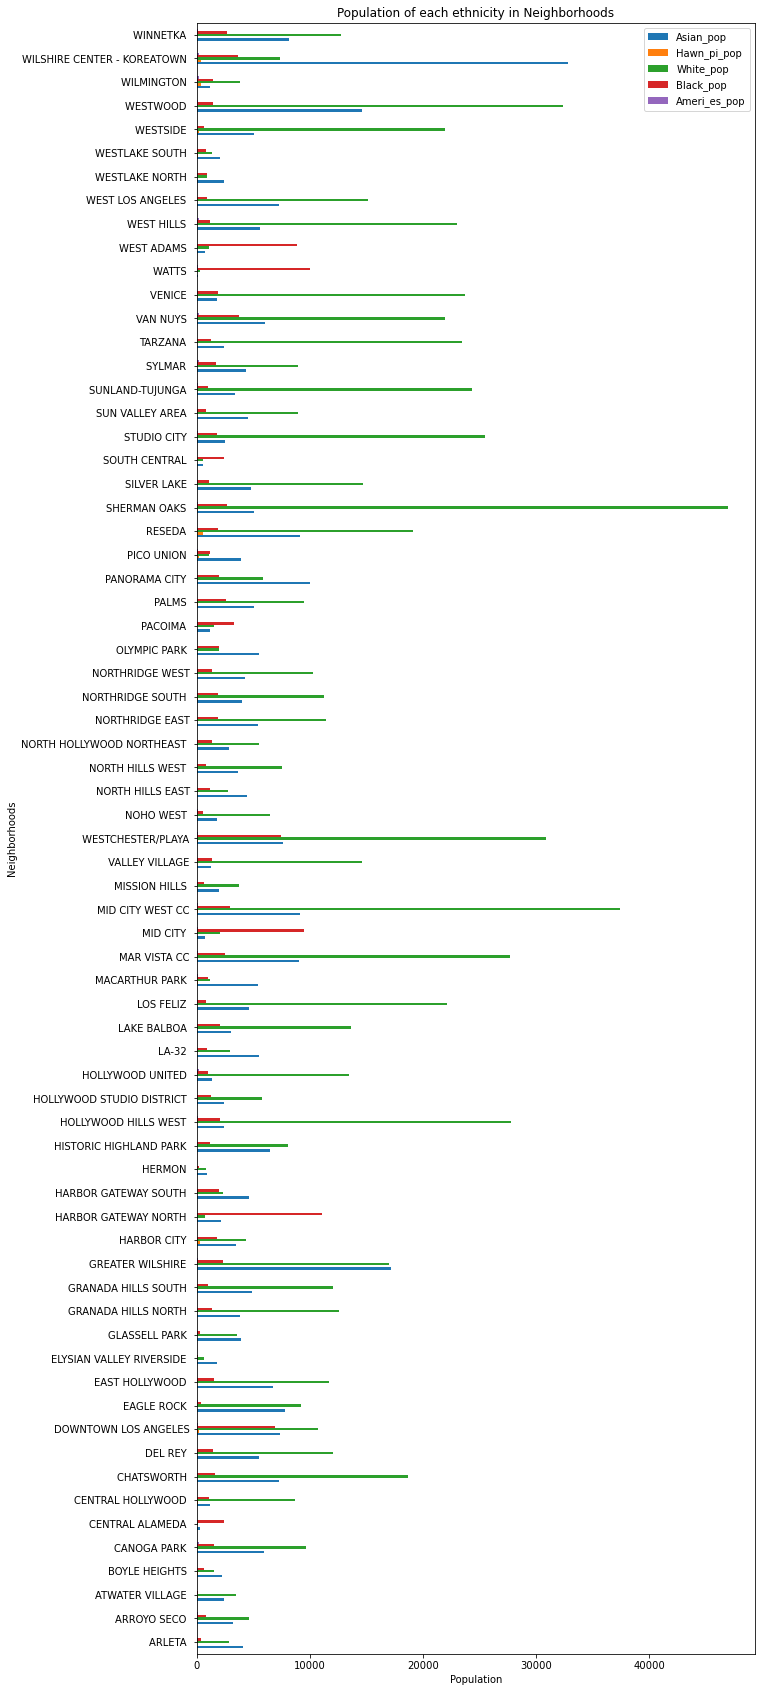

In [267]:
test=LA_merged[['Asian_pop','Hawn_pi_pop', 'White_pop', 'Black_pop','Ameri_es_pop' ]]
test.plot(kind='barh', figsize=(10, 30))
plt.xlabel('Population')
plt.ylabel('Neighborhoods')
plt.title('Population of each ethnicity in Neighborhoods')

In [296]:
Asianpop=LA_merged.sort_values(by ='Asian_pop', ascending=False).head()
cols=[2, 3, 5, 6, 7, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
Asianpop.drop(Asianpop.columns[cols], axis=1, inplace=True)
Asianpop

,Total Population,White_pop,Asian_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,poverty ratio,Cluster Labels
Neighborhood Council,,,,,,,,,,
WILSHIRE CENTER - KOREATOWN,99702.15,7364.20,32842.25,99508.61,2141.05,36026.35,34.062662,-118.290610,0.998059,2
GREATER WILSHIRE,50090.79,17032.14,17145.97,49891.11,6342.81,14220.60,34.052700,-118.452639,0.996014,1
WESTWOOD,55443.69,32378.17,14590.55,42049.98,6384.67,13134.65,34.066895,-118.439945,0.758427,2
PANORAMA CITY,69984.74,5817.77,9983.38,69421.75,6328.07,11481.21,34.224290,-118.445374,0.991956,2
RESEDA,69166.59,19116.06,9114.54,68091.94,10256.75,10025.51,34.200078,-118.536988,0.984463,2


In [294]:
Whitepop=LA_merged.sort_values(by ='White_pop', ascending=False).head()
cols=[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
Whitepop.drop(Whitepop.columns[cols], axis=1, inplace=True)

,Total Population,White_pop,Black_pop,Ameri_es_pop,Asian_pop,Hawn_pi_pop,Other_pop,Multi_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,poverty ratio,Cluster Labels
Neighborhood Council,,,,,,,,,,,,,,,
SHERMAN OAKS,66486.14,46985.69,2645.86,72.47,5054.10,81.99,114.95,2734.24,66246.94,13330.17,17925.01,34.150872,-118.448987,0.996402,2
MID CITY WEST CC,57261.16,37457.19,2913.60,112.87,9092.38,127.01,75.71,2302.19,56535.05,5843.10,24429.22,34.041527,-118.360370,0.987319,2
WESTWOOD,55443.69,32378.17,1466.24,83.11,14590.55,53.25,214.83,1886.53,42049.98,6384.67,13134.65,34.066895,-118.439945,0.758427,2
WESTCHESTER/PLAYA,58145.15,30895.07,7420.76,143.39,7615.58,107.70,119.36,2383.39,54566.26,12612.31,11986.51,33.951684,-118.439007,0.938449,1
HOLLYWOOD HILLS WEST,38427.16,27776.86,2022.39,108.93,2393.87,11.74,56.51,1549.68,38195.68,5673.28,16556.61,34.110485,-118.373388,0.993976,2


In [297]:
cols1=[2, 3, 5, 6, 7]
Whitepop.drop(Whitepop.columns[cols1], axis=1, inplace=True)
Whitepop

,Total Population,White_pop,Asian_pop,In_Poverty,Owner_occ,Renter_occ,Latitude,Longitude,poverty ratio,Cluster Labels
Neighborhood Council,,,,,,,,,,
SHERMAN OAKS,66486.14,46985.69,5054.10,66246.94,13330.17,17925.01,34.150872,-118.448987,0.996402,2
MID CITY WEST CC,57261.16,37457.19,9092.38,56535.05,5843.10,24429.22,34.041527,-118.360370,0.987319,2
WESTWOOD,55443.69,32378.17,14590.55,42049.98,6384.67,13134.65,34.066895,-118.439945,0.758427,2
WESTCHESTER/PLAYA,58145.15,30895.07,7615.58,54566.26,12612.31,11986.51,33.951684,-118.439007,0.938449,1
HOLLYWOOD HILLS WEST,38427.16,27776.86,2393.87,38195.68,5673.28,16556.61,34.110485,-118.373388,0.993976,2


Text(0.5, 1.0, 'White population dominated Neighborhood analysis')

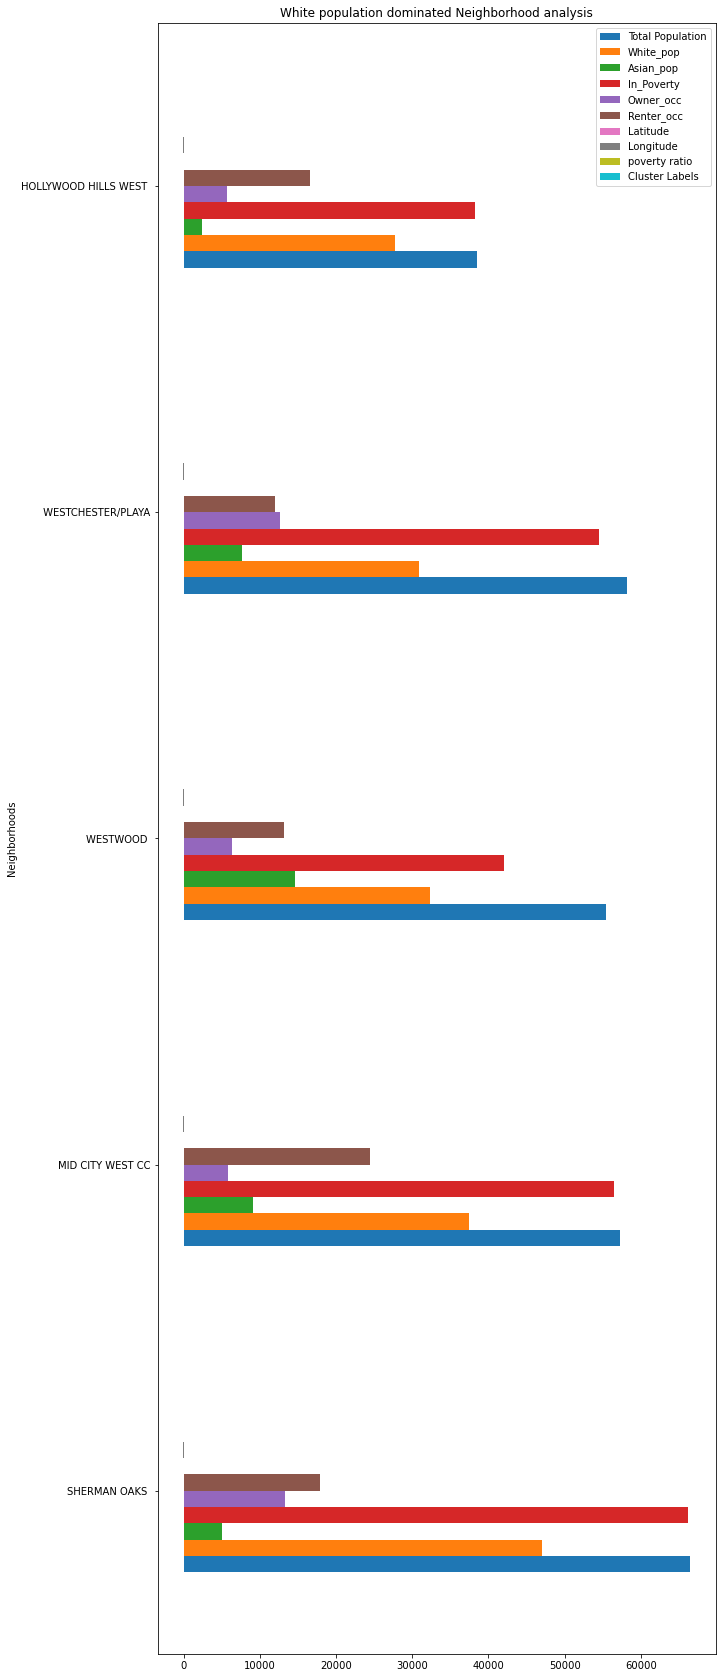

In [299]:
Whitepop.plot(kind='barh', figsize=(10, 30))
plt.ylabel('Neighborhoods')
plt.title('White population dominated Neighborhood analysis')

Text(0.5, 1.0, 'Asian population dominated Neighborhood analysis')

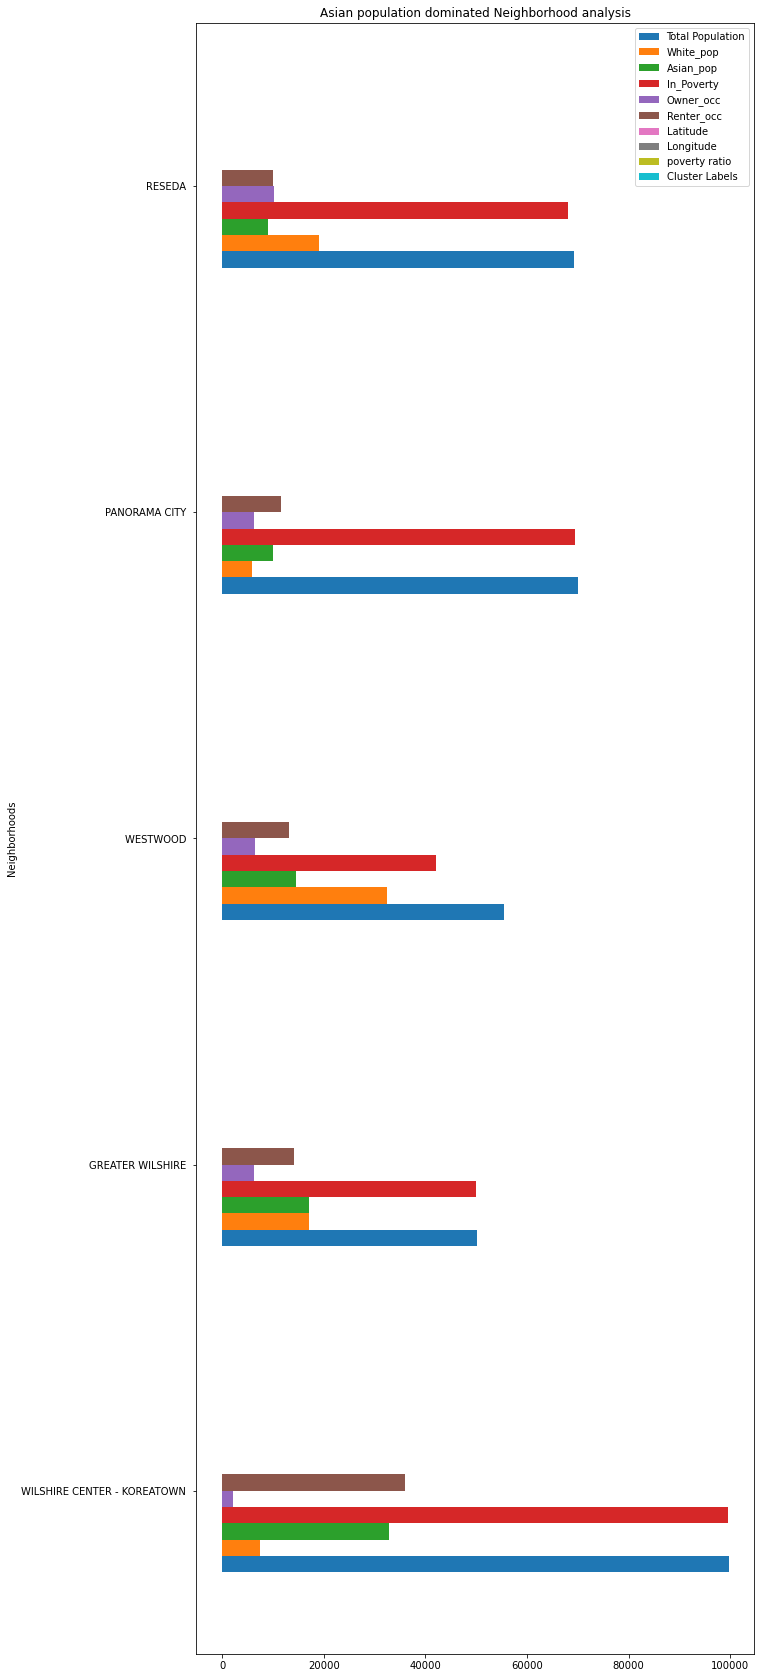

In [301]:
Asianpop.plot(kind='barh', figsize=(10, 30))
plt.ylabel('Neighborhoods')
plt.title('Asian population dominated Neighborhood analysis')

In [310]:
LA_merged.loc['SHERMAN OAKS ']

Total Population                       66486.1
White_pop                              46985.7
Black_pop                              2645.86
Ameri_es_pop                             72.47
Asian_pop                               5054.1
Hawn_pi_pop                              81.99
Other_pop                               114.95
Multi_pop                              2734.24
In_Poverty                             66246.9
Owner_occ                              13330.2
Renter_occ                               17925
Latitude                               34.1509
Longitude                             -118.449
poverty ratio                         0.996402
Cluster Labels                               2
1st Most Common Venue         Sushi Restaurant
2nd Most Common Venue     Gym / Fitness Center
3rd Most Common Venue                Pet Store
4th Most Common Venue              Coffee Shop
5th Most Common Venue             Burger Joint
6th Most Common Venue       Italian Restaurant
7th Most Comm

In [313]:
LA_merged.loc['WILSHIRE CENTER - KOREATOWN ']

Total Population                       99702.1
White_pop                               7364.2
Black_pop                              3608.43
Ameri_es_pop                            216.59
Asian_pop                              32842.2
Hawn_pi_pop                             392.87
Other_pop                               628.59
Multi_pop                              1025.46
In_Poverty                             99508.6
Owner_occ                              2141.05
Renter_occ                             36026.3
Latitude                               34.0627
Longitude                             -118.291
poverty ratio                         0.998059
Cluster Labels                               2
1st Most Common Venue        Korean Restaurant
2nd Most Common Venue              Coffee Shop
3rd Most Common Venue               Food Truck
4th Most Common Venue           Sandwich Place
5th Most Common Venue      American Restaurant
6th Most Common Venue                   Bakery
7th Most Comm